# Life Expectancy and GDP data visualization project

## Scope

The dataset provided _all_data.csv_ has the following columns of data:
* Country - nation, for six countries (Chile, China, Germany, Mexico, USA, Zimbabwe)
* Year - the year for the observation
* Life expectancy at birth (years) - life expectancy value in years
* GDP - Gross Domestic Product in U.S. dollars

I will aim to visualize the following statistics:
* Life expectancy per country per year
* GDP per country per year  
These two plots will be displayed alongside each other.
* Life expectancy vs GDP + per year, for each of the six countries  
These will be painted as six graphs, one for each country


## Preliminaries

In [2]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Read the dataset into a dataframe
df_all = pd.read_csv('all_data.csv') 
# Rename some columns
df_all = df_all.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy'})
# Examine a few data rows
print(df_all.head())

  Country  Year  Life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


## Life expectancy and GDP per year - all countries together

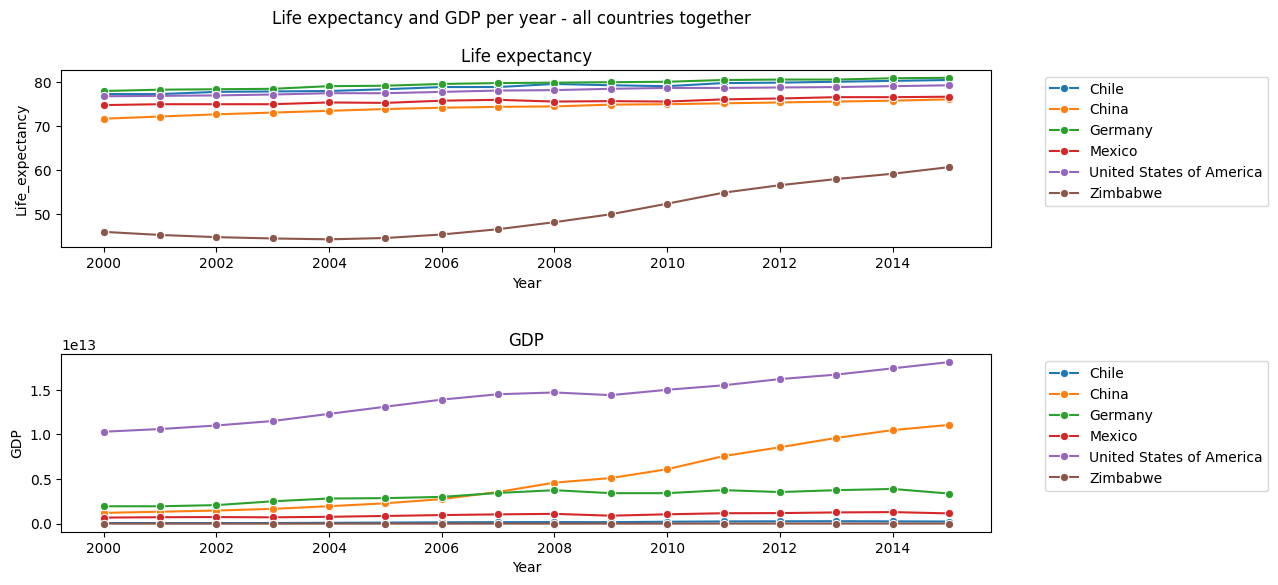

In [4]:
plt.figure(figsize=(12, 6))
#
plt.subplot(2,1,1)
sns.lineplot(data=df_all, x='Year', y='Life_expectancy', marker='o', hue='Country')
plt.title('Life expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside the plot
#
plt.subplot(2,1,2)
sns.lineplot(data=df_all, x='Year', y='GDP', marker='o', hue='Country')
plt.title('GDP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside the plot
#
plt.suptitle('Life expectancy and GDP per year - all countries together')
plt.subplots_adjust(hspace=0.6)
plt.show()

# Observations: Life Expectancy and GDP common graphs

* Life expectancy
  * Zimbabwe was significanly lower than the other countries in Life Expectancy during these years. LE was between 45-55 in Zimbabwe in this year range, and 70-80 in other countries.
  * In Zimbabwe we see a decrease between 2000-2004, and increase after than.
  * In the other countries there seems to a steady increase in LIfe Expectancy, although it is difficult to see in the present scale.

* GDP
  * USA was significant higher in GDP than the other countries during these years. It was also rising.
  * China was not, until 2007, but then it started an increase in GDP, steeper than all the other countries.
  * For the other counties, it difficult to see on this scale whether the GDP increasted or remained more or less the same.
  * Next in GDP size is Germay, then Mexico. Chile and Zimbabwe were the lowest in GDP during these years.

* Life expectancy vis-a-vis GDP
  * Generally speaking, the LIfe Expectancy graph and the GDP graph look different. There does not seem to be a simple correlation between Life Expectancy and GDP, when comparing different countries. About the relationship between GDP and Life Expectacny within each country, see graphs below.

## Life expectancy and GDP per year - graph per country

In [5]:
## Get a list of all the countries
countries = df_all['Country'].value_counts().index

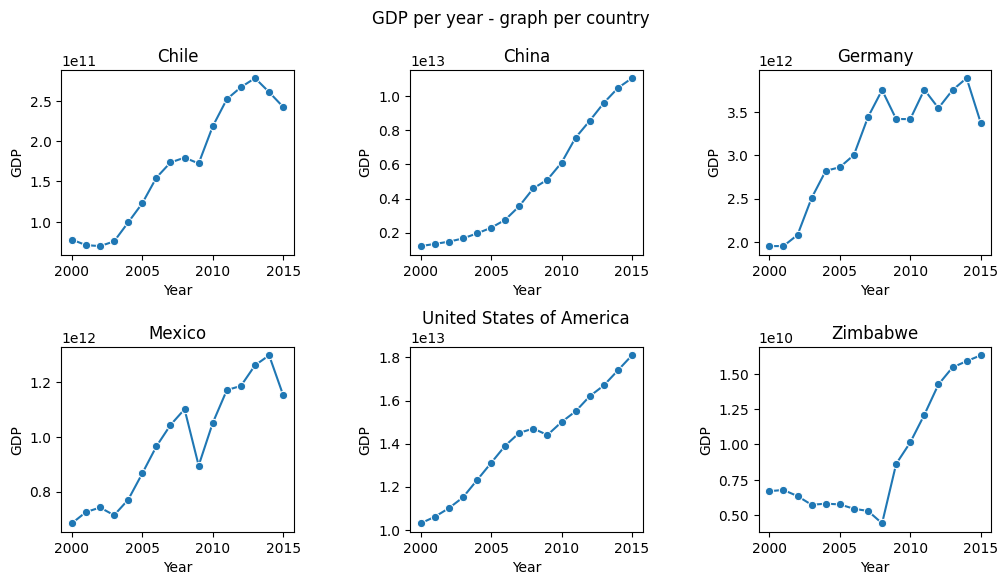

In [6]:
# Loop over all the countries and draw a graph for each country
plt.figure(figsize=(12, 6))
for i in range(len(countries)):
    plt.subplot(2, 3, i+1)
    sns.lineplot(data=df_all[df_all.Country == countries[i]], x='Year', y='GDP', marker='o')
    plt.title(countries[i])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('GDP per year - graph per country')
plt.show()

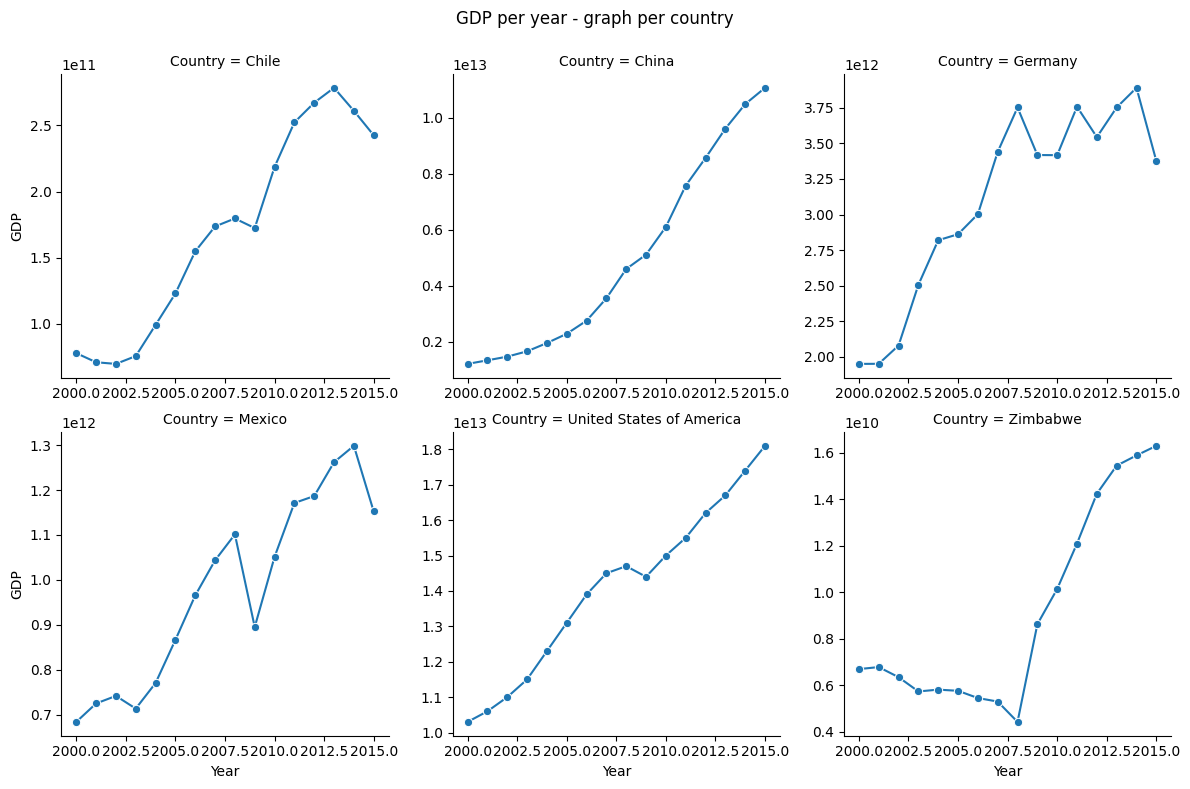

In [24]:
g = sns.FacetGrid(df_all, col="Country", col_wrap=3, col_order=countries, height=4, sharex=False, sharey=False)
g.map(sns.lineplot, 'Year', 'GDP', marker='o')
plt.subplots_adjust(top=0.9)
plt.suptitle('GDP per year - graph per country')
plt.show()


# Observations - GDP separate graphs

* Chile: A rough plateau between 2000-2003. A roughly linear increase until 2013. Then decrease until 2015.
* China: A moderate linear rise between 2000-2007. Then a steeper linear rise until 2015.
* Germany: A plateau 2000-2001. A steep rise 2001-2008. Then vacillates up and down 2008-2015.
* Mexico: A linear increase until 2008. A steep decrease in 2009. Then increase until 2014. A steep decrease in 2015.
* USA: A linear increase 2000-2007. A plateau until 2009. Then increase again.
* Zimbabwe: A moderate decrease 2000-2008. A steep increase until 2013. Then a less steep increase until 2015.

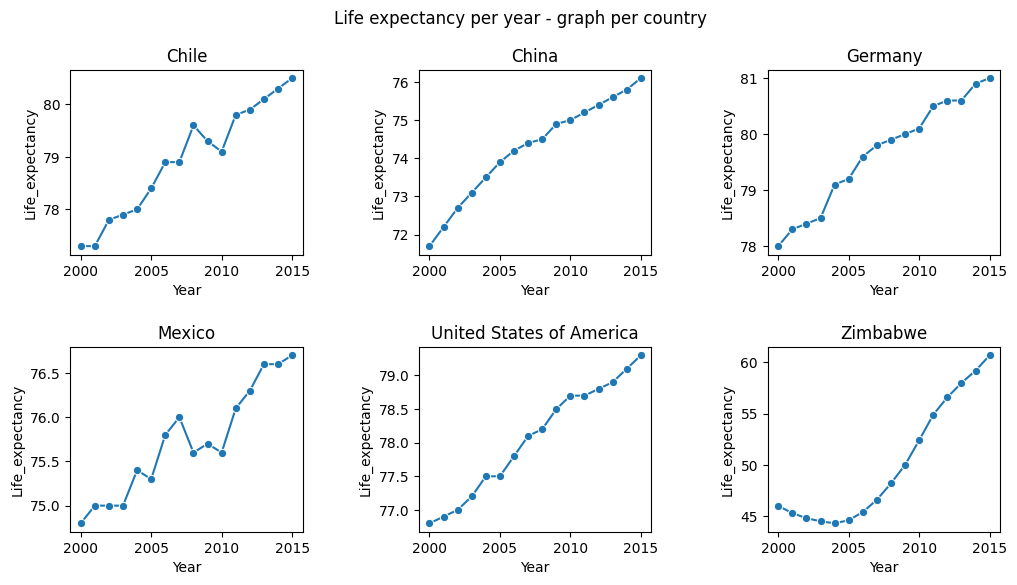

In [7]:
# Loop over all the countries and draw a graph for each country
plt.figure(figsize=(12, 6))
for i in range(len(countries)):
    plt.subplot(2, 3, i+1)
    sns.lineplot(data=df_all[df_all.Country == countries[i]], x='Year', y='Life_expectancy', marker='o')
    plt.title(countries[i])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('Life expectancy per year - graph per country')
plt.show()

# Observations - Life Expectancy separate graphs

* Chile: 2001-2008 rise from 77 to 79.5. Until 2015 moderate rise to 80.5.
* China: 2000-2006 rise 71.5 to 74. Until 2015 moderate rise to 76.
* Germany: 2000-2015 rise roughly linear from 78 to 81.
* Mexico: 2000-2015 rose with ups and downs from 75 to 76.5.
* USA: 2000-2015 rise roughly linear from 77 to 79.
* Zimbabwe: 2000-2006 stayed near 45. 2006-2015 rose gradually to 60!

## Life Expectancy vis-a-vis GDP - graph per country

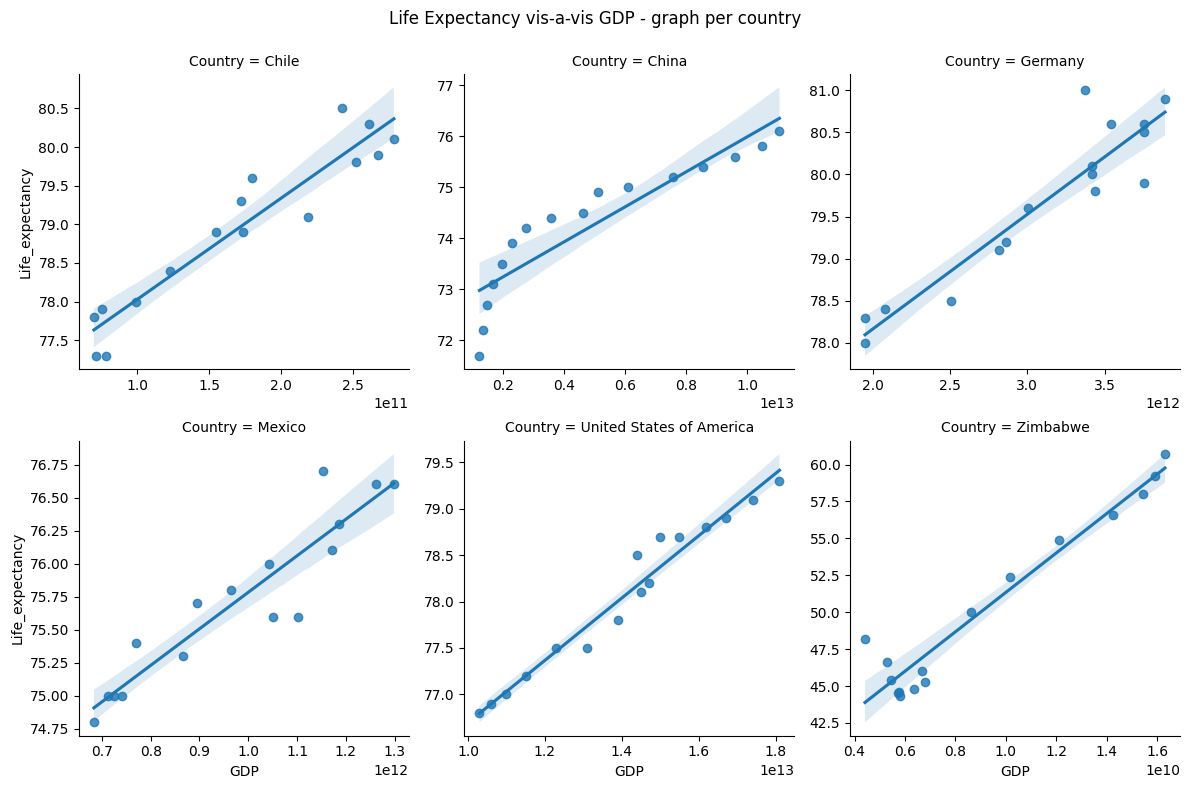

In [22]:
g = sns.FacetGrid(df_all, col="Country", col_wrap=3, col_order=countries, height=4, sharex=False, sharey=False)
g.map(sns.regplot, 'GDP', 'Life_expectancy') # Place scatter plots with regression lines in the grid
plt.subplots_adjust(top=0.9)
plt.suptitle('Life Expectancy vis-a-vis GDP - graph per country')
plt.show()


# Observations - Life Expectancy vis-a-vis GDP - graph per country

* We see that in general the Life Expectancy increases when the GDP increases, within the same country. Moreover, the relationship between GDP and Life Expectancy seems to be roughly linear in all cases, even though each country has its own range of GDP and Life Expectancy.
* When we compare different countries, a country with a greater GDP does not necesssarily have a corresponding greater Life Expectancy.